<a href="https://colab.research.google.com/github/Meshva-p/Outlier-detection---Clinical-trails/blob/main/adlb_data_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal of this notebook is to visualize some of the lab data from adlb.csv in a first place.
- The original dataset has been modified and missing values were deleted for simplification. Also, non-numerical values weren't considered! 
- Idea of this notebook is to detect visually some possible outliers and to try if the same outliers could be detected by an algorithm
- However, another idea is, that for this type of labdata, simple threshold values from a healthy patient could be considered as min/max threshold values (e.g. from medical literature). Everything below min or above max-threshold could be considered as an outlier without the need of an algorith (simple if/else conditions). However, this assumes that the thresholds are not changing from patient to patient (depending on age, weight, etc. and assuming the literature data could be applied also for patients having already medical issues, at least for some of the serum lab values --> on the other hand, for some serum lab values for cancer patients, eg. Leukocyte the values are rarely normal, so another approach would be needed) Just some thoughts...

## Import of libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import re
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings("ignore")

## Import original adlb.csv

In [ ]:
original_df = pd.read_csv('adlb.csv', low_memory=False)

In [ ]:
original_df.shape

(134750, 47)

## Import modified adlb_dropped.csv
### performed operations: 
1. Deleted NaN values rows for LBORRES column
2. Deleted all rows containing characters (e. g.: 'TRACE', 'NEGATIVE', '1+', '++', '1000<10000', '+ (33 UMOL/L)', '6-8', '0.39 (39%)' --> these can't be converted to float )

In [ ]:
df = pd.read_csv('adlb_dropped.csv', low_memory=False)

In [ ]:
df.shape

(116653, 51)

## Check for percentage of dropped lines in regards to LBORRES

In [ ]:
delta = original_df.shape[0] - df.shape[0]

In [ ]:
delta

18097

In [ ]:
(delta/original_df.shape[0])*100

13.430055658627088

## Apply datetime format for dates

In [ ]:
df['datetime'] = df.apply(lambda x: datetime.datetime.strptime(x['LBDTC'], '%Y-%m-%d'), axis=1)

In [ ]:
df.head()

,Unnamed: 0,STUDYID,USUBJID,SUBJID,INVID,SAFFL,TRTP,TRTPN,TRTA,TRTAN,...,CHG,ANL01FL,ANL02FL,ANL03FL,ANL04FL,ANL05FL,ANL06FL,datetime,lborres,aval
0,0,CP12-0606,CP12-0606/1192-1207,1192-1207,INQ6663,Y,Placebo + Docetaxel,0.0,Placebo + Docetaxel,0.0,...,NaN,NaN,Y,NaN,NaN,NaN,NaN,2012-09-01,37.0,37.0
1,1,CP12-0606,CP12-0606/1192-1207,1192-1207,INQ6663,Y,Placebo + Docetaxel,0.0,Placebo + Docetaxel,0.0,...,NaN,NaN,Y,NaN,NaN,NaN,NaN,2012-09-12,33.0,33.0
2,2,CP12-0606,CP12-0606/1192-1207,1192-1207,INQ6663,Y,Placebo + Docetaxel,0.0,Placebo + Docetaxel,0.0,...,4.0,NaN,Y,NaN,NaN,NaN,NaN,2012-10-03,37.0,37.0
3,3,CP12-0606,CP12-0606/1192-1207,1192-1207,INQ6663,Y,Placebo + Docetaxel,0.0,Placebo + Docetaxel,0.0,...,3.0,NaN,Y,NaN,NaN,NaN,NaN,2012-10-24,36.0,36.0
4,4,CP12-0606,CP12-0606/1192-1207,1192-1207,INQ6663,Y,Placebo + Docetaxel,0.0,Placebo + Docetaxel,0.0,...,-1.0,NaN,Y,NaN,NaN,Y,NaN,2012-11-14,32.0,32.0


## List of unique laboratory parameters measured

In [ ]:
parameters = df['PARAM'].unique()

In [ ]:
parameters

array(['Albumin', 'Alkaline Phosphatase', 'Alanine Aminotransferase',
       'Aspartate Aminotransferase', 'Bilirubin', 'Blood Urea Nitrogen',
       'Calcium', 'Chloride', 'Carbon Dioxide', 'Creatinine', 'Glucose',
       'Potassium', 'Magnesium', 'Protein', 'Sodium', 'Hematocrit',
       'Hemoglobin', 'Neutrophils', 'Platelet', 'Erythrocytes',
       'Leukocytes', 'Activated Partial Thromboplastin Time',
       'Prothrombin Intl. Normalized Ratio', 'Prothrombin Time',
       'Bacteria', 'Casts', 'Crystals', 'Epithelial Cells',
       'Creatinine Clearance', 'pH', 'Specific Gravity', 'Ketones'],
      dtype=object)

## List of unique patients IDs existing in the study

In [ ]:
patients = df['SUBJID'].unique()

In [ ]:
patients

array(['1192-1207', '1193-1830', '1352-5611', '1353-5123', '1353-5464',
       '1353-5743', '1353-5880', '1752-5024', '1752-5031', '1752-5653',
       '1752-5737', '1792-1993', '1792-5169', '1792-5178', '1792-5659',
       '1795-1253', '1795-5290', '1834-5538', '1835-5471', '1836-5057',
       '1836-5301', '1836-5459', '1871-5107', '1871-5163', '1871-5881',
       '1872-1545', '1872-1807', '1872-5215', '1872-5507', '1873-5070',
       '1873-5096', '1878-5062', '1878-5066', '1878-5139', '1878-5332',
       '1879-5587', '1879-5900', '2455-5539', '2455-5873', '2458-1114',
       '2791-5175', '2792-5597', '2910-5320', '2910-5752', '2915-1173',
       '2915-5015', '2915-5120', '2915-5154', '2915-5236', '2919-5113',
       '2950-5773', '2950-5848', '2951-1162', '2951-1196', '2951-1293',
       '2951-1873', '2951-5021', '2951-5265', '2951-5268', '2951-5305',
       '2951-5310', '2951-5357', '2951-5382', '2951-5393', '2951-5420',
       '2951-5495', '2951-5615', '2951-5661', '2951-5760', '2951

## Plot laboratory parameters for whole population (all SUBJIDs)
# Outliers are clearly visible for some values
# Some parameters are not yet filtered by different measurement methods! Split to be applied for eg. Leukocytes (Urine/Serum/Microscope etc. analysis)


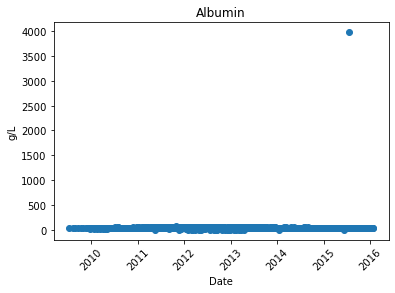

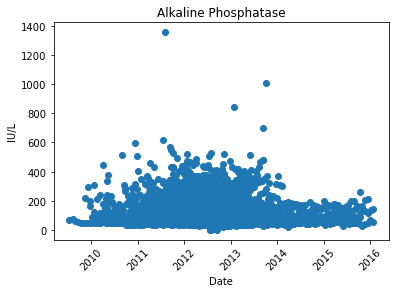

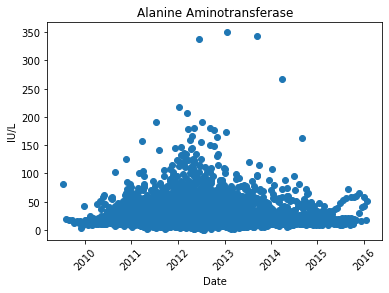

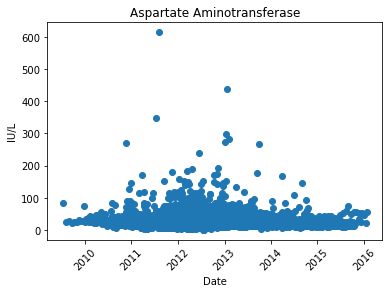

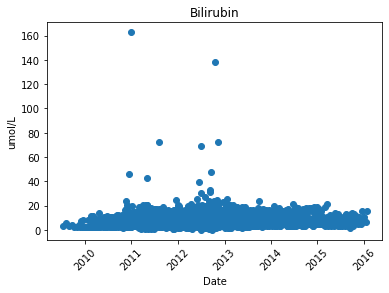

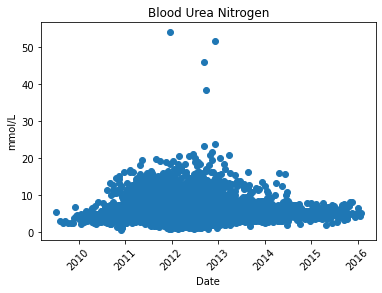

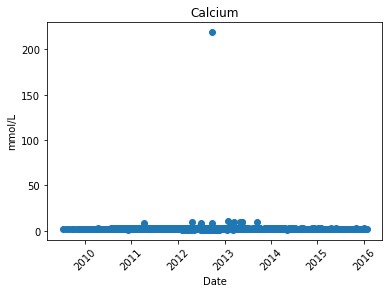

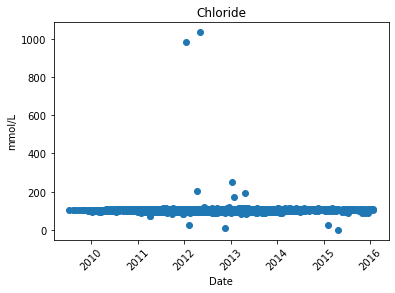

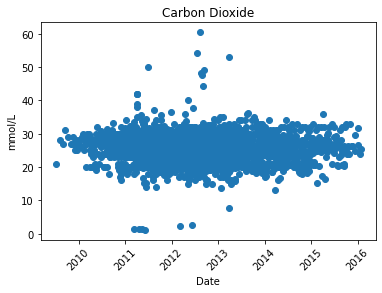

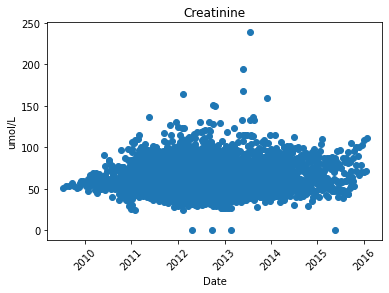

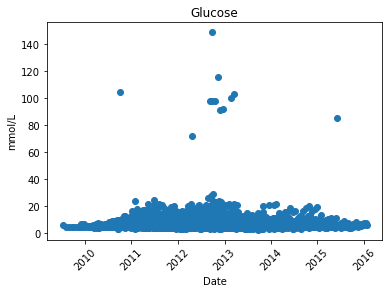

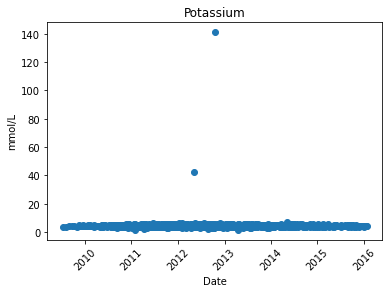

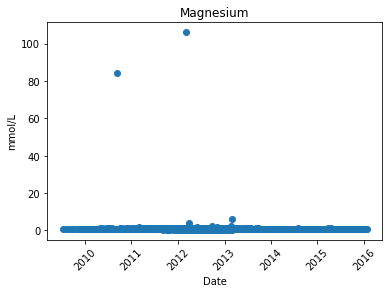

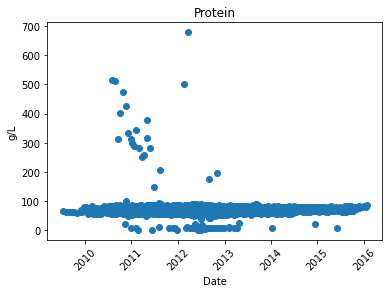

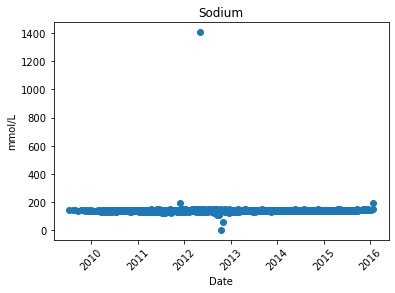

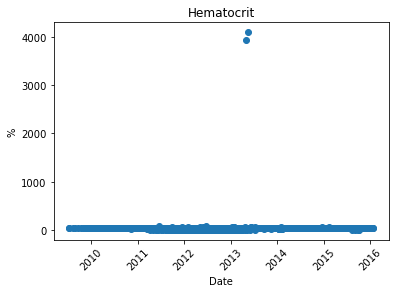

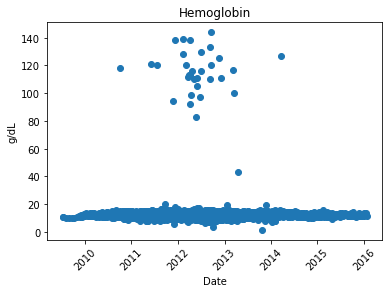

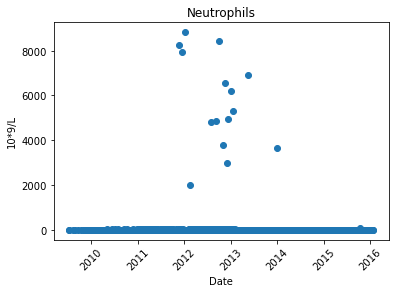

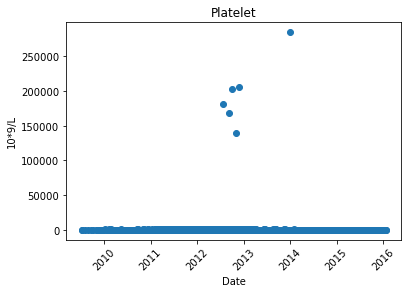

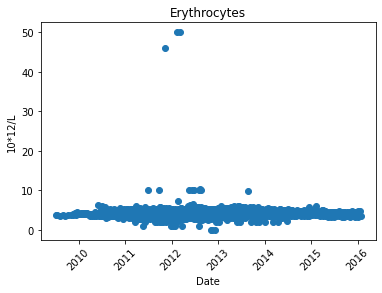

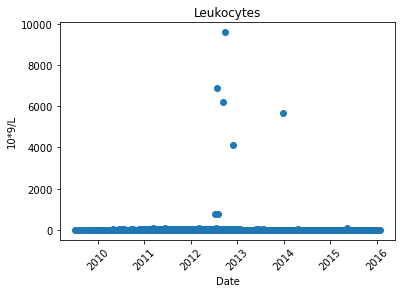

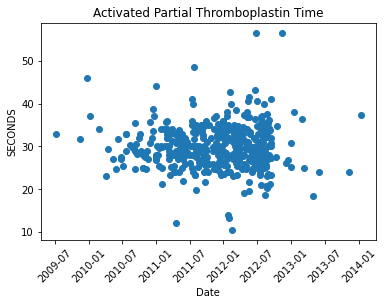

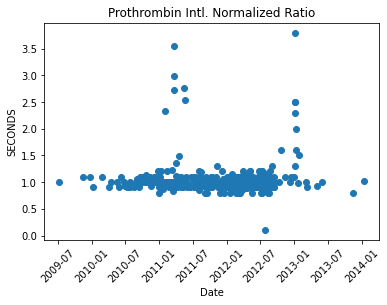

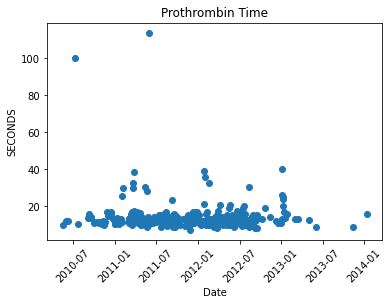

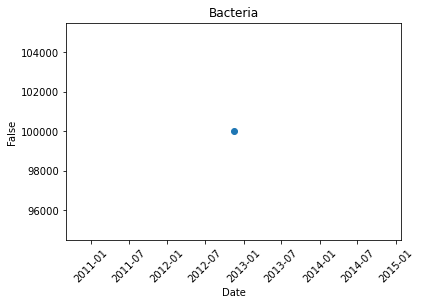

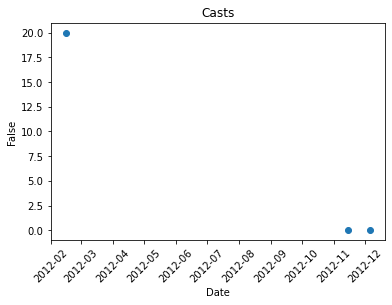

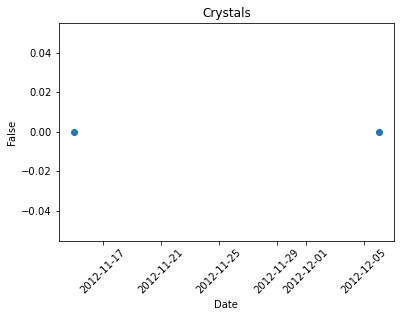

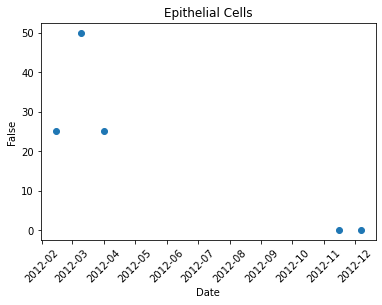

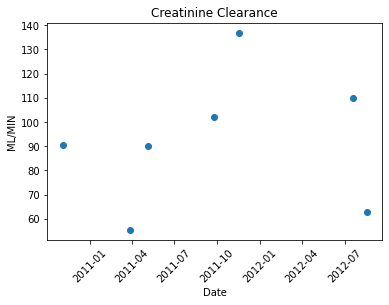

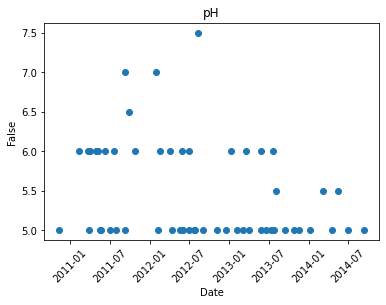

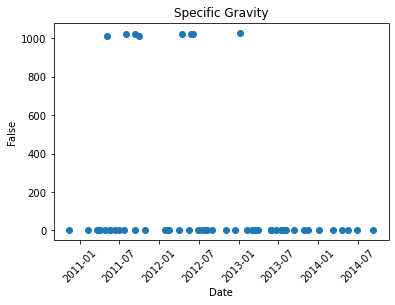

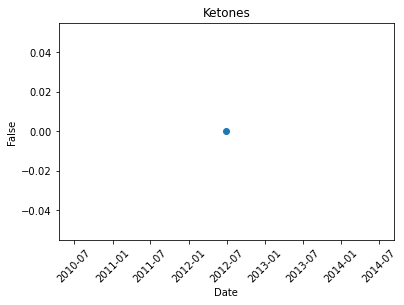

In [ ]:
for parameter in parameters:
    x_coord = df[df['PARAM'] == parameter]['datetime']
    y_coord = df[df['PARAM'] == parameter]['aval']
    units = df[df['PARAM'] == parameter]['LBSTRESU'].any()
    #upper_limit = df[df['PARAM'] == parameter]['lbornrhi']
    #lower_limit = df[df['PARAM'] == parameter]['lbornrlo']
    ax = plt.subplot()
    plt.scatter(x_coord, y_coord)
    plt.xlabel('Date')
    plt.ylabel(units)
    #if upper_limit.any():
    #    plt.hlines(upper_limit, xmin = x_coord.min(), xmax = x_coord.max(), color='red', linestyles = '--')
    #if lower_limit.any():   
    #    plt.hlines(lower_limit, xmin = x_coord.min(), xmax = x_coord.max(), color='red', linestyles = '--')
    plt.xticks(rotation = 45) 
    plt.title(parameter)
    plt.show()

### Some values from the above plots appear like outliers, but according to literature eg. Leucocytes have a wide range. Problem, a strong increase ('jump') in these values for a single patient might be also considered to be an anomaly

## Grabbed 'Alkaline Phosphatase', since outliers visible (literature normal range: 35 - 105 U/l --> healthy adult woman ), plotted for all SUBJIDs

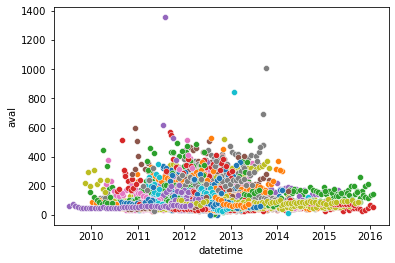

In [ ]:
for patient in patients:
    x_coord2 = df[(df['PARAM'] == 'Alkaline Phosphatase') & (df['SUBJID'] == patient)]['datetime']
    y_coord2 = df[(df['PARAM'] == 'Alkaline Phosphatase') & (df['SUBJID'] == patient)]['aval']
    #sns.lineplot(data=df, x=x_coord2, y=y_coord2)
    sns.scatterplot(data=df, x=x_coord2, y=y_coord2)

In [ ]:
## Checking the units

In [ ]:
df[df['PARAM'] == 'Alkaline Phosphatase'].LBSTRESU.unique()

array(['IU/L'], dtype=object)

In [ ]:
#since the units are everywhere the same, the huge difference seems not to be the origin of different units

## Checking some values for a single patient --> SUBJID 1192-1207

In [ ]:
df_SUBJID_1192_1207 = df.loc[df["SUBJID"] == '1192-1207', :]

In [ ]:
df_SUBJID_1192_1207['lborres'] = df_SUBJID_1192_1207.apply(lambda x: float(x['LBORRES']), axis=1)

In [ ]:
df_SUBJID_1192_1207['anrhi'] = df_SUBJID_1192_1207.apply(lambda x: float(x['ANRHI']), axis=1)

In [ ]:
df_SUBJID_1192_1207['anrlo'] = df_SUBJID_1192_1207.apply(lambda x: float(x['ANRLO']), axis=1)

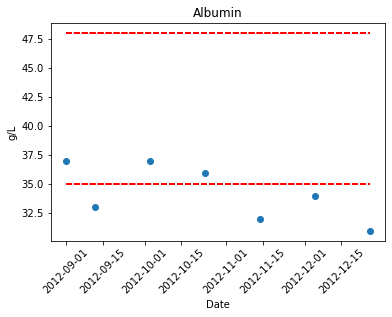

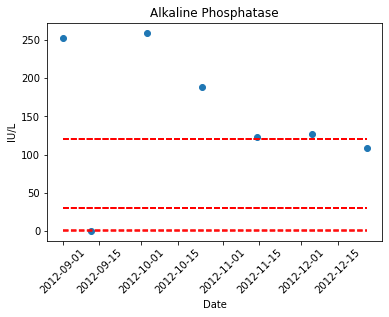

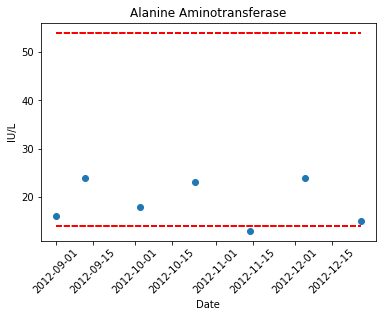

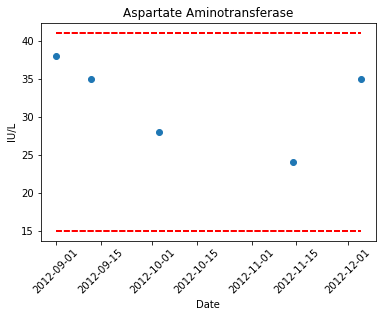

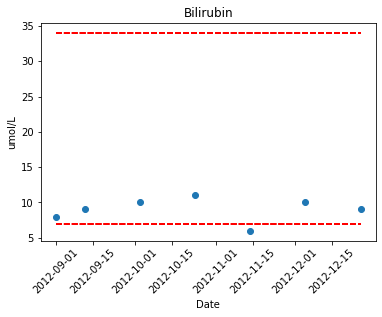

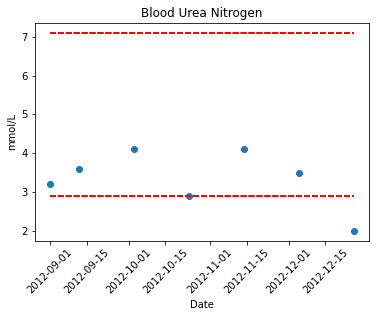

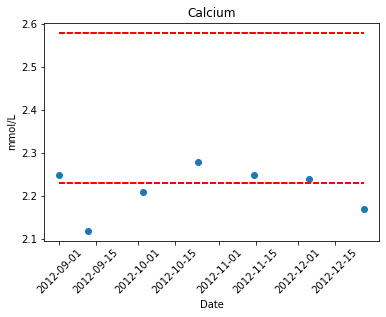

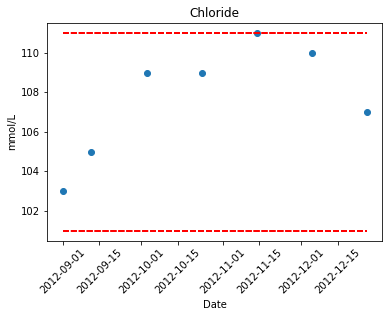

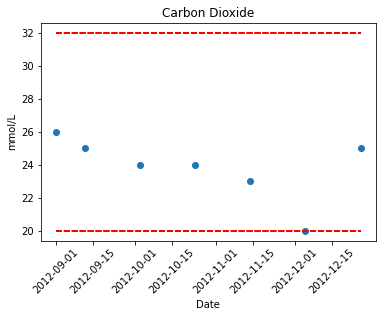

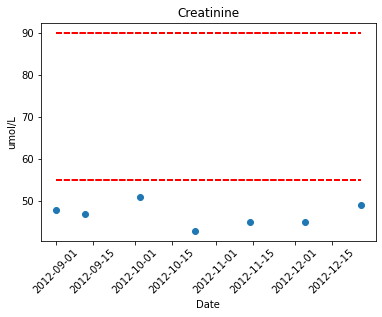

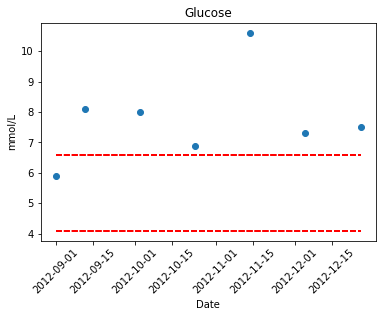

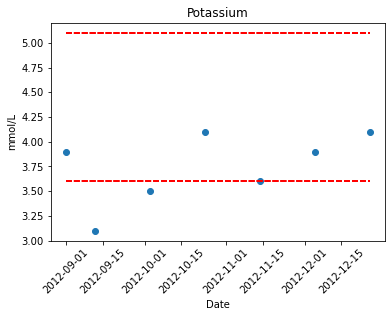

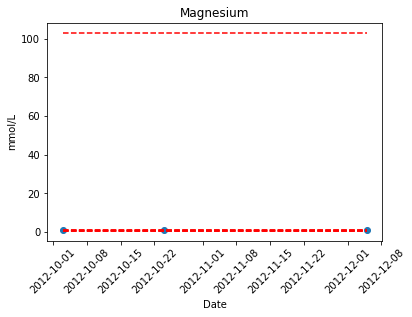

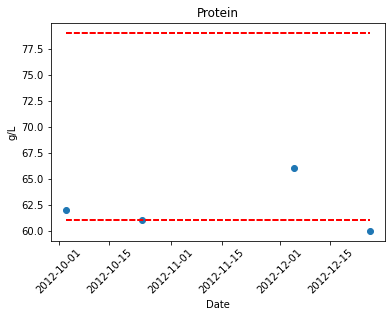

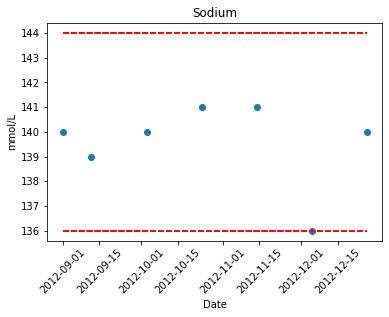

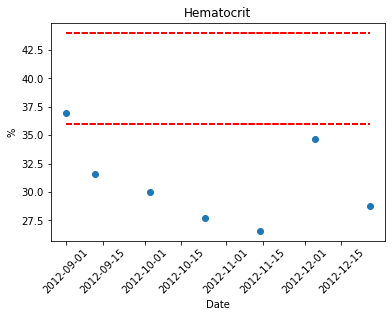

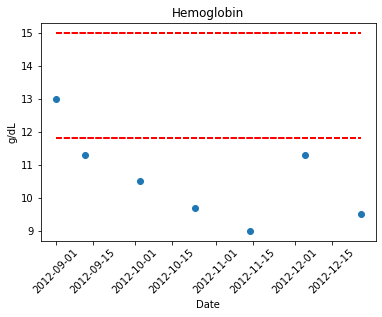

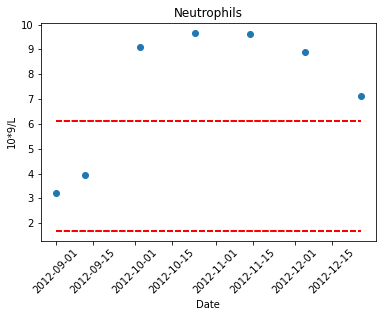

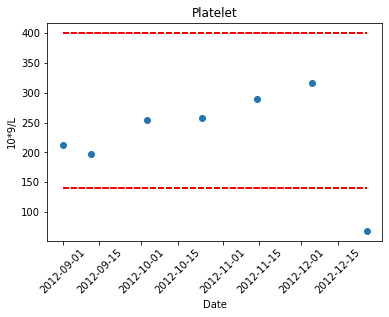

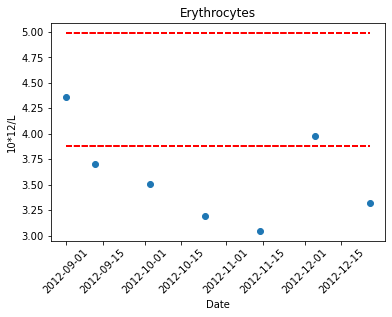

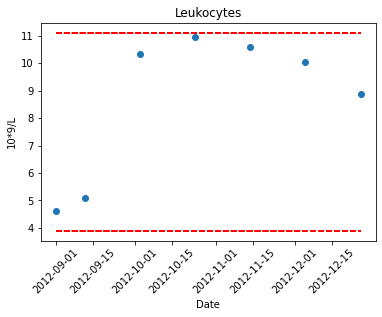

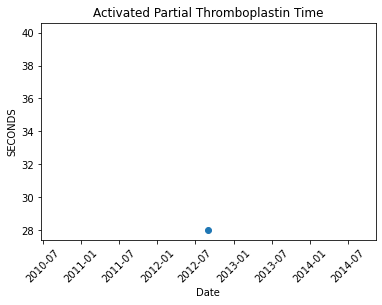

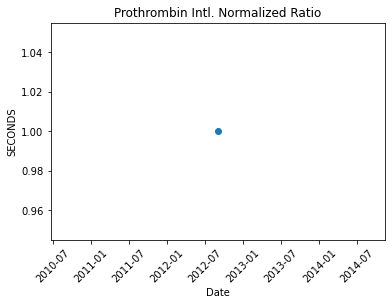

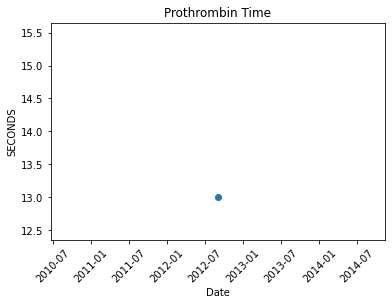

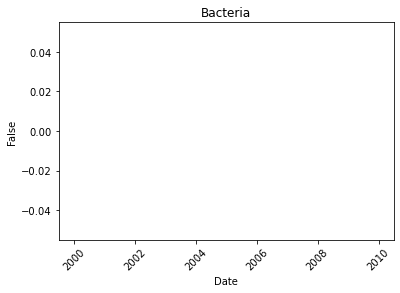

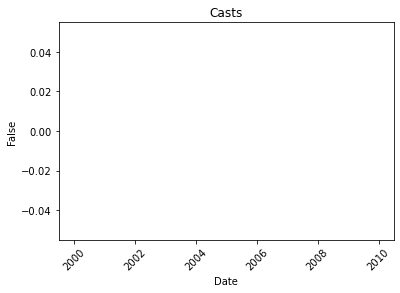

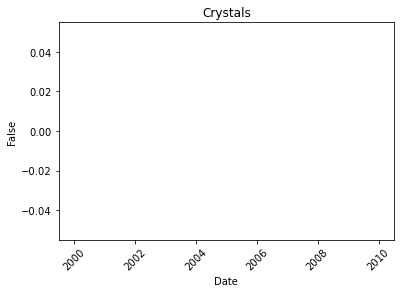

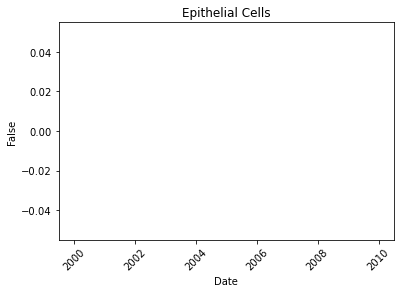

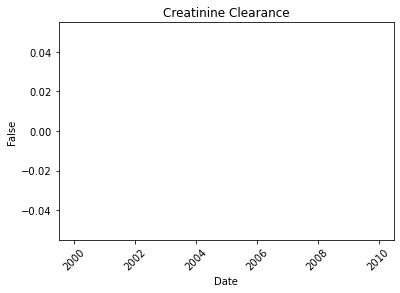

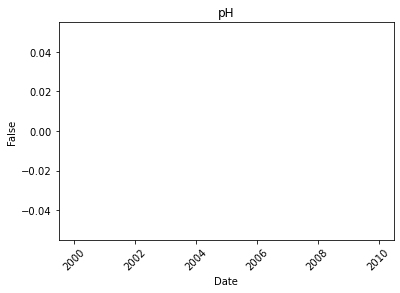

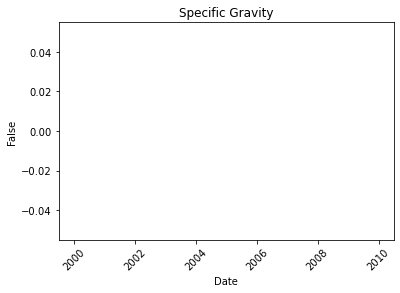

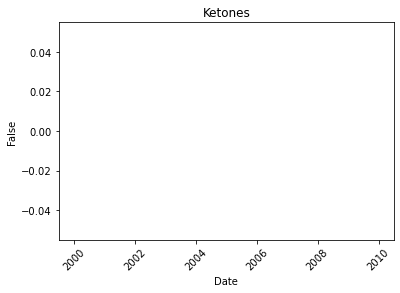

In [ ]:
for parameter in parameters:
    x_coord = df_SUBJID_1192_1207[df_SUBJID_1192_1207['PARAM'] == parameter]['datetime']
    y_coord = df_SUBJID_1192_1207[df_SUBJID_1192_1207['PARAM'] == parameter]['aval']
    units = df_SUBJID_1192_1207[df_SUBJID_1192_1207['PARAM'] == parameter]['LBSTRESU'].any()
    upper_limit = df_SUBJID_1192_1207[df_SUBJID_1192_1207['PARAM'] == parameter]['anrhi']
    lower_limit = df_SUBJID_1192_1207[df_SUBJID_1192_1207['PARAM'] == parameter]['anrlo']
    plt.scatter(x_coord, y_coord)
    plt.xlabel('Date')
    plt.ylabel(units)
    if upper_limit.any():
        plt.hlines(upper_limit, xmin = x_coord.min(), xmax = x_coord.max(), color='red', linestyles = '--')
    if lower_limit.any():   
        plt.hlines(lower_limit, xmin = x_coord.min(), xmax = x_coord.max(), color='red', linestyles = '--')
    plt.xticks(rotation = 45) 
    #plt.gca().invert_yaxis()
    plt.title(parameter)
    plt.show()

## Idea: take the whole population over the total duration of study and try to apply Markov Chains 

necessary: probability matrix considering whole population

visualization

encoding unclear, could be something: 

if labvalue increases with +10 % --> +1

if labvalue decreases with -10 % --> -1

if labvalue remains same --> 0


or according to ANRLO/ANRHI (But these values seem to be recalculated based on the Labresults, if they are wrong, the thresholds are also wrong...)
If the ANRLO/ANRHI were defined correctly, the values could be used for outlier detection simply by an if/else condition based on the threshold values, see example below